In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sales = pd.read_excel("CoffeeShopSales.xlsx")
sales

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [6]:
# most selled products
# most profitable stores
# most profitable product categories 
# sales between particular time 
# sales between particular dates

# least selling items in product list
# Product types available in each product category
# which store has most sale from product_id 32 or any other on the basis of product_type
# transaction_id at a particualar location
# Most Profitable stores
# Sales in a particular time -- Hours/ Days/ Months/ weekdays v/s weekends
# Stores location with a particular product
# Find the product type from Product detail which is most in sales 
# To check if the product price varies in different location

In [7]:
# To view the total rows and columns in a dataframe
print(sales.shape)
print(f"number of rows : {sales.shape[0]} and number of columns : {sales.shape[1]}")

# To check for the duplicated rows in the dataframe
print(f"number of duplicated rows : {sales.duplicated().sum()}")

(149116, 11)
number of rows : 149116 and number of columns : 11
number of duplicated rows : 0


In [8]:
# For checking the Data types and matching with the table
sales.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [9]:
# Calculation of Total sales
sales["total_sales"] = sales["unit_price"] * sales["transaction_qty"]
sales.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


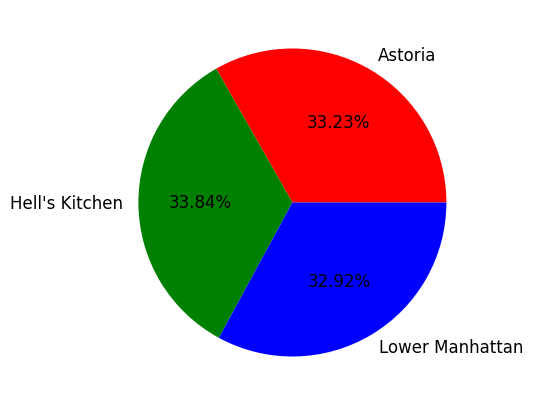

In [10]:
# Finding the total sales as per store location
store_sales = pd.DataFrame(sales.groupby("store_location")["total_sales"].sum()).reset_index()

# Ploting the pie chart with the help of matplotlib
plt.figure(figsize=(10,5))
plt.pie(store_sales["total_sales"],
        labels=store_sales["store_location"],
        autopct="%1.2f%%",
        colors=['red', 'green', 'blue'],
        textprops={'fontsize': 12})

plt.show()

In [11]:
# For Changing the data type of the column
sales["transaction_time"] = pd.to_datetime(sales["transaction_time"], format="%H:%M:%S")
sales.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time    datetime64[ns]
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
total_sales                float64
dtype: object

In [12]:
print(sales["product_category"].unique())

['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']


In [13]:
sales.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales
0,1,2023-01-01,1900-01-01 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,1900-01-01 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,1900-01-01 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,2023-01-01,1900-01-01 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,1900-01-01 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


In [14]:
# Datewise sales using input user for month year
month = input("Enter the month : ")

# trend_sales = sales[sales["transaction_date"].dt.month == int(month)]
date_trend_sale = pd.DataFrame(sales[sales["transaction_date"].dt.month == int(month)].groupby(sales["transaction_date"].dt.date)["total_sales"].sum()).reset_index()
date_trend_sale["transaction_date"] = pd.to_datetime(date_trend_sale["transaction_date"])

print(date_trend_sale)

# Ploting Line Chart
plt.figure(figsize=(12,6))
plt.plot(date_trend_sale['transaction_date'], date_trend_sale['total_sales'], marker='o',linestyle='-', color='red', label='Total Sales')
plt.title('Month wise sales', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(date_trend_sale['transaction_date'], labels=date_trend_sale['transaction_date'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

ValueError: invalid literal for int() with base 10: ''

In [ ]:
# Making one month columnn of month names
# insert syntax is sales.insert(index, column_name, value)

sales.insert(2, "month", sales["transaction_date"].dt.strftime("%B"))
sales.head()

,transaction_id,transaction_date,month,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales
0,1,2023-01-01,January,1900-01-01 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,January,1900-01-01 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,January,1900-01-01 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,2023-01-01,January,1900-01-01 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,January,1900-01-01 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


In [ ]:
# Making a columns of day of week
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

sales.insert(3, "day_of_week", sales["transaction_date"].dt.strftime("%A"))
sales.head()

,transaction_id,transaction_date,month,transaction_time,transaction_qty,day_of_week,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales
0,1,2023-01-01,January,1900-01-01 07:06:11,2,Sunday,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,January,1900-01-01 07:08:56,2,Sunday,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,January,1900-01-01 07:14:04,2,Sunday,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,2023-01-01,January,1900-01-01 07:20:24,1,Sunday,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,January,1900-01-01 07:22:41,2,Sunday,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


## **Problem Statement 1**


Question - Write a Python script that prompts the user to enter a month and a store location. Using a dataset containing "transaction_date" and "total_sales", filter the data to calculate total daily sales for the selected month and location. Then, visualize the sales trend using a line chart. Ensuring proper date formatting on the x-axis.

Empty DataFrame
Columns: [transaction_date, total_sales]
Index: []


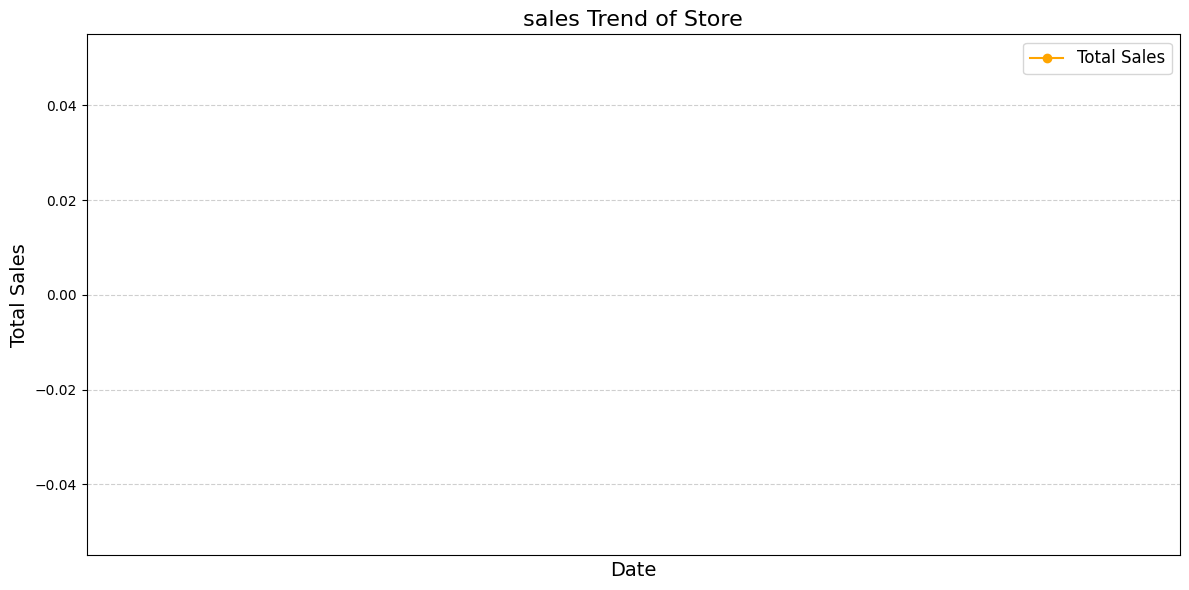

In [ ]:
# Question - 1: Datewise sales using input user for month yearar
month = input("Enter the month, 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December': ")
location = input("Enter the location'Lower Manhattan, Hell's Kitchen, Astoria : ")

# trend_sales = sales[sales["transaction_date"].dt.month == int(month)]
date_trend_sale = pd.DataFrame(sales[(sales["transaction_date"].dt.strftime("%B") == month) & 
                                     (sales["store_location"] == location)]
                                     .groupby(sales["transaction_date"].dt.date)["total_sales"].sum()).reset_index()
date_trend_sale["transaction_date"] = pd.to_datetime(date_trend_sale["transaction_date"])

print(date_trend_sale)

# Ploting Line Chart
plt.figure(figsize=(12,6))
plt.plot(date_trend_sale['transaction_date'], date_trend_sale['total_sales'], marker='o',linestyle='-', color='orange', label='Total Sales')
plt.title(f'{month} sales Trend of Store {location}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(date_trend_sale['transaction_date'], labels=date_trend_sale['transaction_date'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## **Problem Statement 2**

Question - Write a Python Script that prompts the user to enter a month and a product category. Using a dataset with "transaction_date","product_category", and "transaction_qty", filter the data to compute the total quantity sold for each product type within the selected month and category. Visualize the results using a bar chart, ensuring proper labelling and formatting

In [ ]:
# Question - 2
month = input("Enter the month (in numbers) : ")
product_category = input("Enter the product_category,'Coffee'/'Tea'/'Drinking Chocolate'/'Bakery'/'Flavours'/'Loose Tea'/'Coffee Beans'/'Package'")

qty_order_pt = pd.DataFrame(sales[sales["transaction_date"].dt.month == int(month) &
                                  (sales["product_category"] == product_category)].groupby("product_type")["transaction_qty"].sum()).reset_index()

qty_order_pt

# Plotting the bar chart
plt.figure(figsize=(12,6))
plt.bar_label(plt.bar(qty_order_pt['product_type'], qty_order_pt['transaction_qty'], color='green', label='Total Sales'))
plt.title(f'{month}sales Trend of Store {product_category}', fontsize=16)
plt.xlabel('Product Type', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(qty_order_pt['product_type'], labels=qty_order_pt['product_type'], rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

ValueError: invalid literal for int() with base 10: ''

## **Problem 3**

Grouping the main

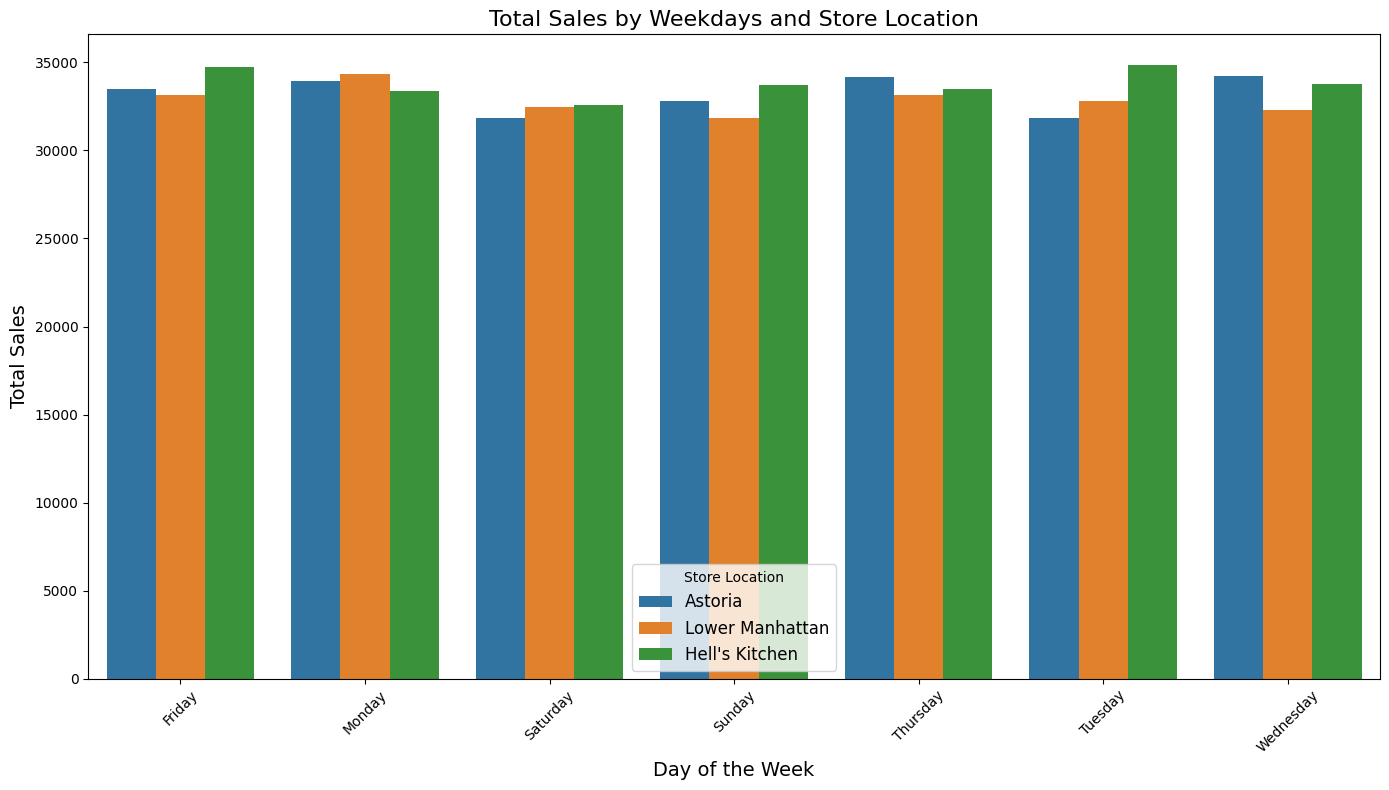

In [ ]:
# Grouping the data by store location and day of the week to calculate total sales
weekday_sales = pd.DataFrame(sales.groupby(["store_location", "day_of_week"])["total_sales"].sum()).reset_index()

# Sorting the days of the week for proper order in the bar chart
weekday_sales["day_of_week"] = weekday_sales["day_of_week"].astype("category")
weekday_sales["day_of_week"].cat.set_categories(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
weekday_sales = weekday_sales.sort_values("day_of_week")

# Plotting the bar chart
plt.figure(figsize=(14,8))
sns.barplot(x="day_of_week", y="total_sales", hue="store_location", data=weekday_sales)
plt.title('Total Sales by Weekdays and Store Location', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Store Location', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

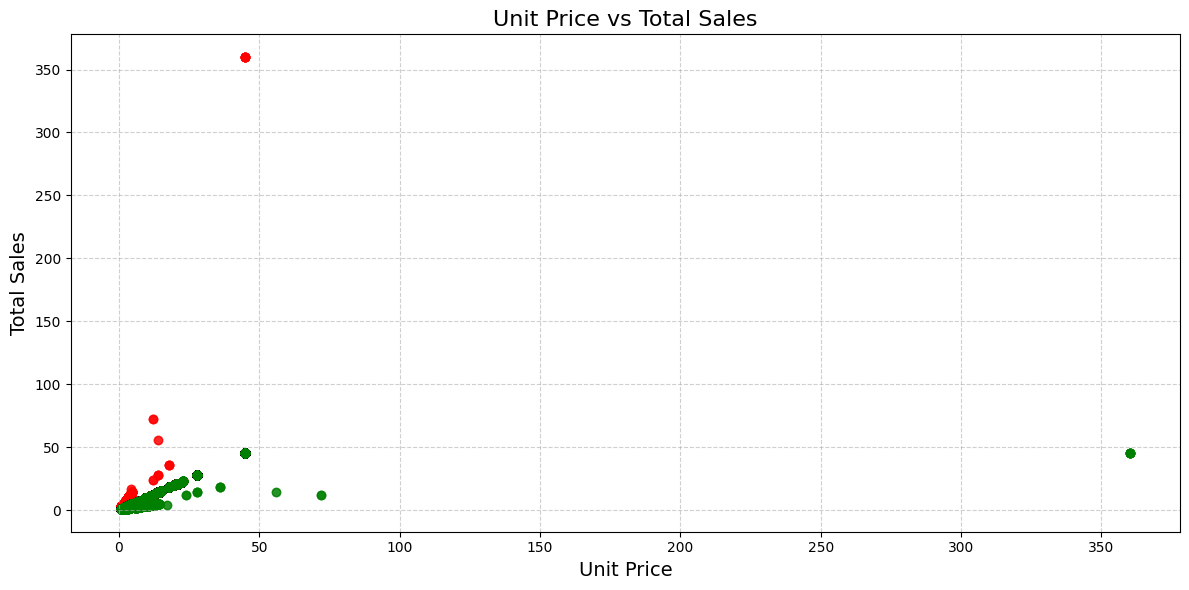

In [ ]:
plt.figure(figsize = (12, 6))
plt.scatter(sales['unit_price'], sales['total_sales'], color='red', alpha = 0.6, label='Unit Price')

# Plot total sales (Green)
plt.scatter(sales['total_sales'], sales['unit_price'], color='green', alpha=0.6, label='Total Sales')
plt.title('Unit Price vs Total Sales', fontsize=16)
plt.xlabel('Unit Price', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

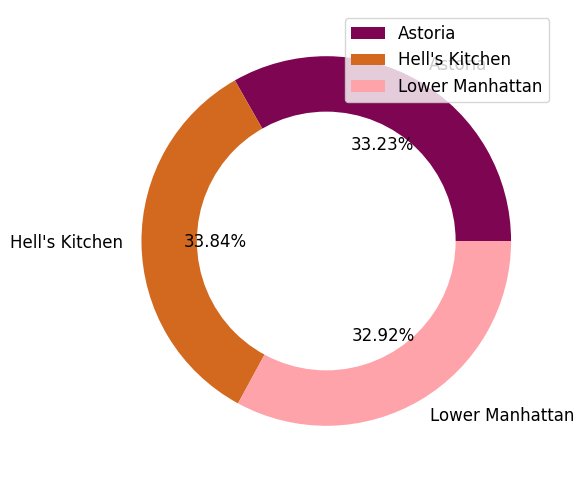

In [ ]:
store_sales = pd.DataFrame(sales.groupby("store_location")["total_sales"].sum()).reset_index()
plt.figure(figsize=(10, 6))
plt.pie(store_sales["total_sales"],
        labels = store_sales["store_location"],
        autopct='%1.2f%%',
        colors=['#7D0552', '#D2691E', '#FEA3AA'],
        textprops={'fontsize':12})
plt.gca().add_artist(plt.Circle((0,0), 0.70, fc='white'))
plt.legend(fontsize = 12, loc='upper right')
plt.show()

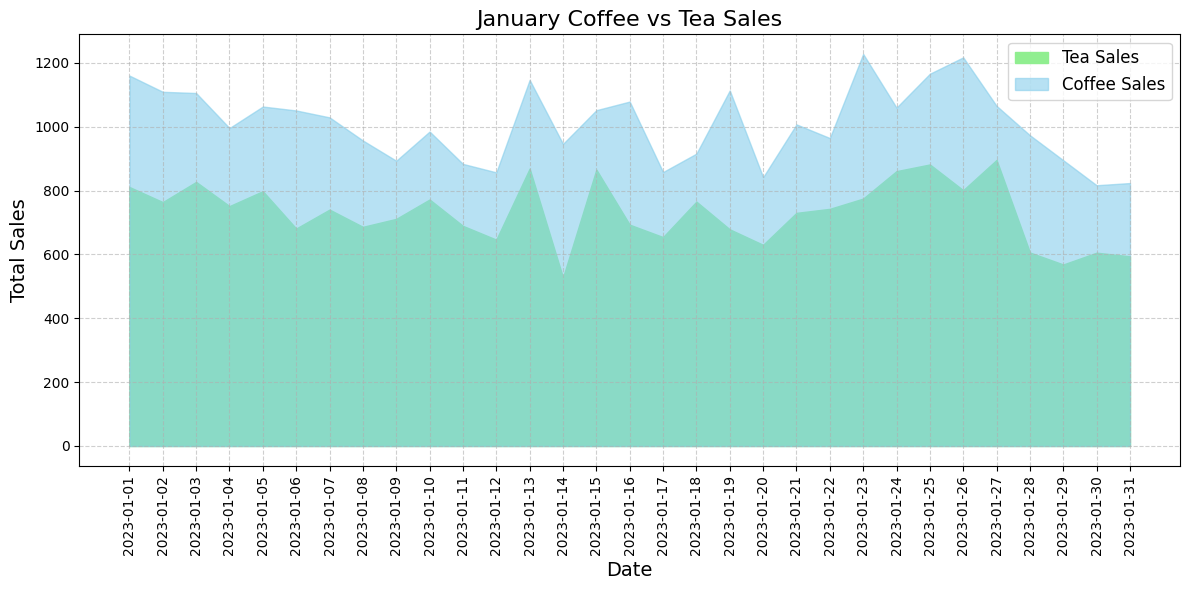

In [ ]:
# Filled Area Chart
month =  input("Enter the month ['January', 'February', 'March', 'April', 'May', 'June']: ")

tea_data = sales[(sales["product_category"]=="Tea") &
                 (sales["transaction_date"].dt.strftime("%B") == month)].groupby("transaction_date")["total_sales"].sum().reset_index()

coffee_data = sales[(sales["product_category"] == "Coffee") &
                    (sales["transaction_date"].dt.strftime("%B") == month)].groupby("transaction_date")["total_sales"].sum().reset_index()

# Plotting the Graph
plt.figure(figsize=(12,6))

# Fill area means fill the area between the line and x-axis with color
plt.fill_between(tea_data['transaction_date'], tea_data['total_sales'], color = "lightgreen", alpha = 1, label = 'Tea Sales')
plt.fill_between(coffee_data['transaction_date'], coffee_data['total_sales'], color = "skyblue", alpha = 0.6, label = 'Coffee Sales')
plt.title(f'{month} Coffee vs Tea Sales', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Total Sales', fontsize = 14)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.xticks(tea_data["transaction_date"], labels = tea_data['transaction_date'].dt.strftime('%Y-%m-%d'), rotation = 90)
plt.legend(fontsize = 12)
plt.tight_layout()
plt.show()

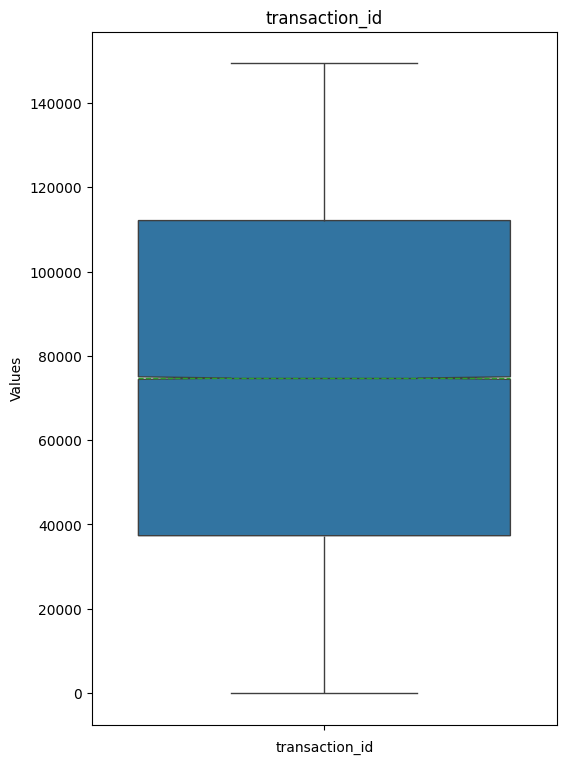

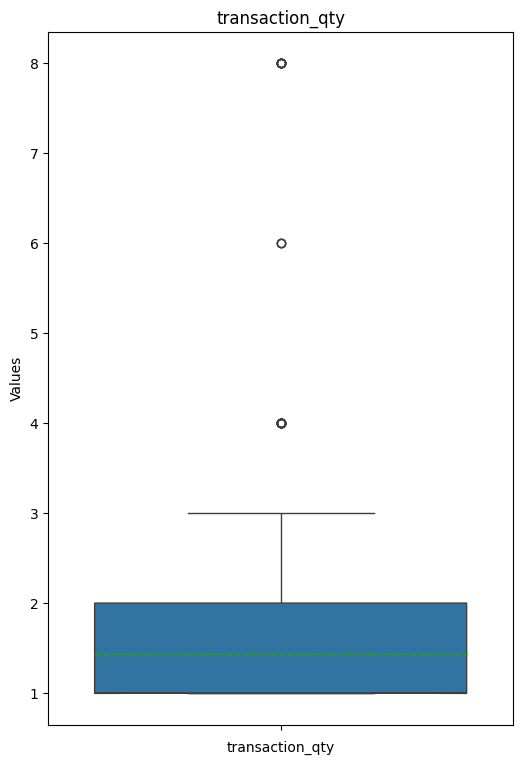

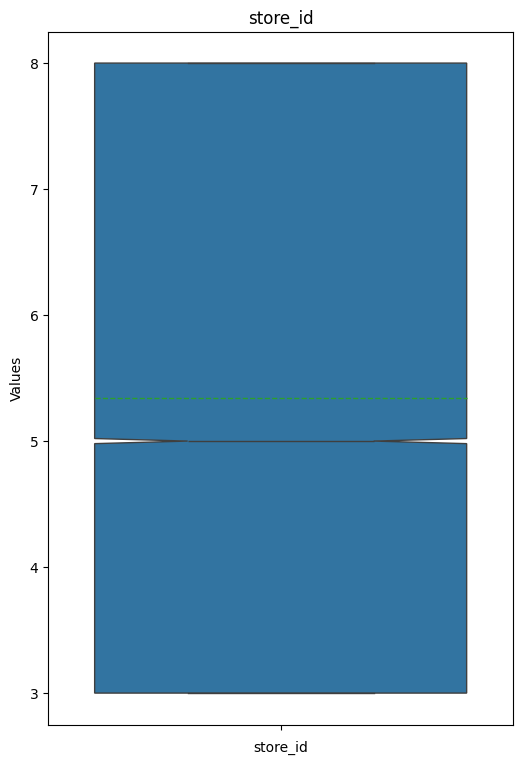

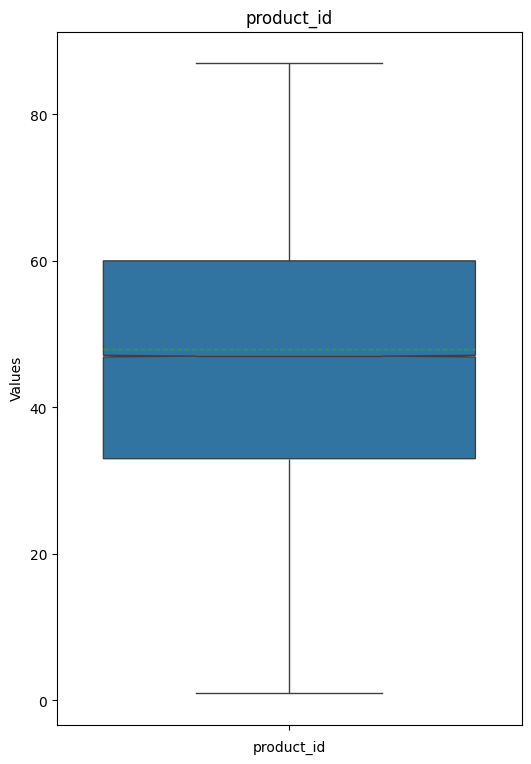

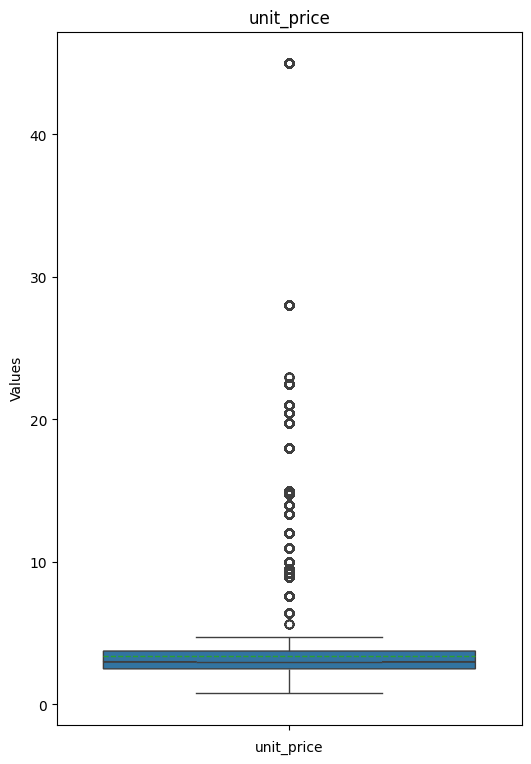

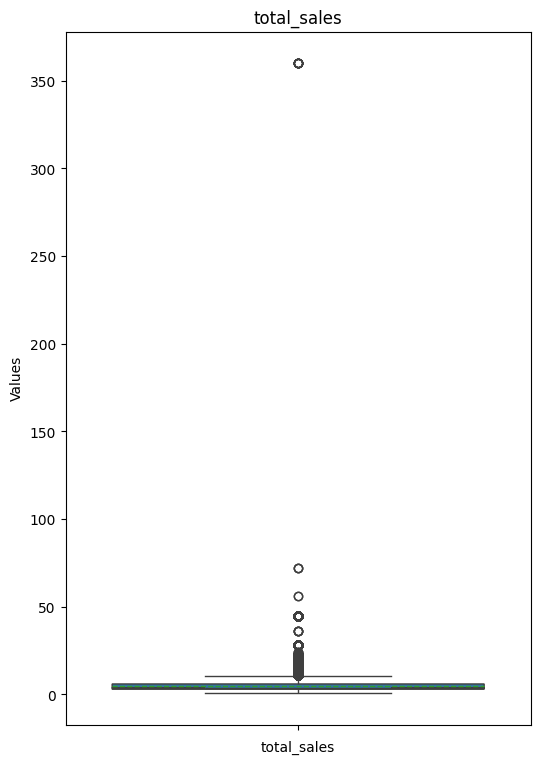

In [ ]:
# Box Plot
for i in sales.select_dtypes(include="number"): # Loop through the columns in the data set which are of numeric data type and plot the box plot for each column
    plt.figure(figsize=(6,9))
    sns.boxplot(sales[i], patch_artist = True, notch = True, showmeans = True, meanline = True)
    # Plot the box plot for each column, patch_artist = True is used to fill the box plot with color,
    # notch = True is used to show the confidence interval,
    # showmeans = True is used to show the mean of the data,
    # meanline = True is used to show the mean line in the box plot
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.show()

## **Heatmap**

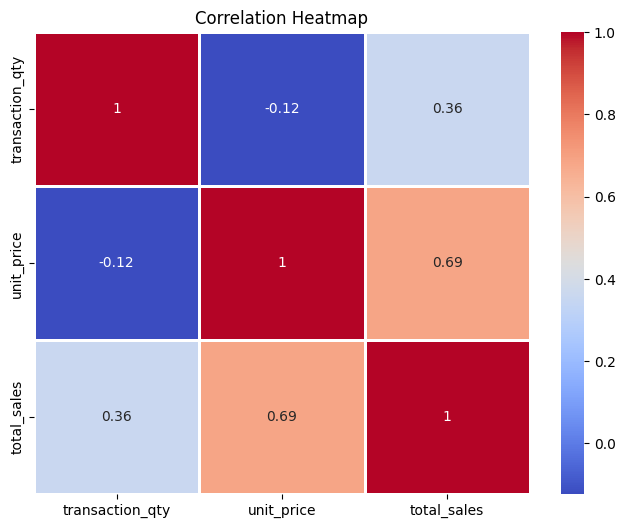

In [20]:
correlation = sales[['transaction_qty', 'unit_price', 'total_sales']]

# Compute correlation matrix
corr = correlation.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.9)
plt.title("Correlation Heatmap")
plt.show()